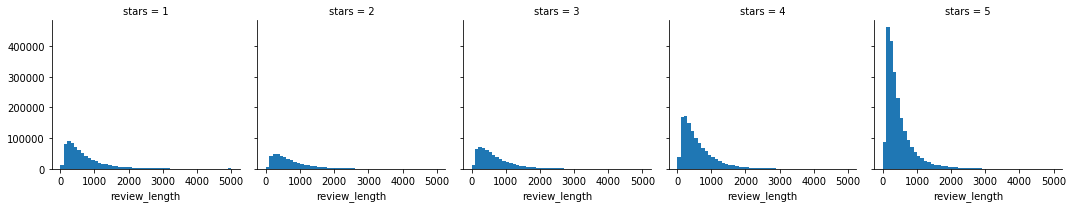

In [14]:
from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.json("file:///Users/yashparikh/Project/dataset/review.json")
df.createOrReplaceTempView("reviews")
length_vs_star_DF = spark.sql("SELECT length(text) as review_length, stars FROM reviews").toPandas()
review_len_by_stars = sns.FacetGrid(data=length_vs_star_DF, col='stars')
review_len_by_stars.map(plt.hist, 'review_length', bins=50)


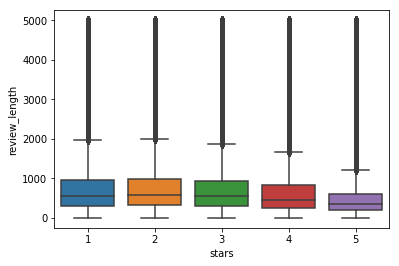

In [15]:
sns.boxplot(x='stars', y='review_length', data=length_vs_star_DF)